

# TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

><b>In this project, I am going to investigate a dataset that contains information, such as generes, cast, revenue etc., about 10,000 movies. The information included in this dataset was collected from The Movie Database(TMDb). The first aim of this analysis and project is to find factors that can affect movies revenues, profits. Such factors include movies budget, runtime, and genres. In the second aim, I am willing to investigate what genres are most produced every year and also to investigate how much is being spent on movies industry from one year to another. So, our dependent variables for the first year will be the revenue and profit while independent variables will include budget, runtime, and movie genre. 

### Questions?
<b>
<br>1- what are the mobies with highest and lowest budget, revenue, and profit? 
<br>2- What is the relation between budget, revenue, and profit?
<br>3- What genres are most produced every year? 
<br>4- what are the genres with highest and lowest profit/revenue?
<br>5- what is the relation between runtime and profit/revenue?
<br>6- Does the average buget of movies industry increase/ decrease from one year to another?


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Loading the data and exploring the first and last two rows

In [72]:
#I will now read the data file called 'tmdb-movies.csv'
df=pd.read_csv('tmdb-movies.csv')
#I am going to print out the first 2 lines in the file
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [73]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### Exploring the dataset characteristics

In [74]:
# We now investigate the shape of this dataset (how many columns and how many rows)
df.shape

(10866, 21)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Checking cleanliness

In [76]:
#The release date data type is object and therefore we want to make sure if it is in datetime format or not 
type(df['release_date'][1])

str

In [77]:
#Now we want to know if there are missing values or not and their count 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [78]:
sum(df.isnull().sum())

13434

In [79]:
#checking for duplicated rows
df.duplicated().sum()

1

In [80]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


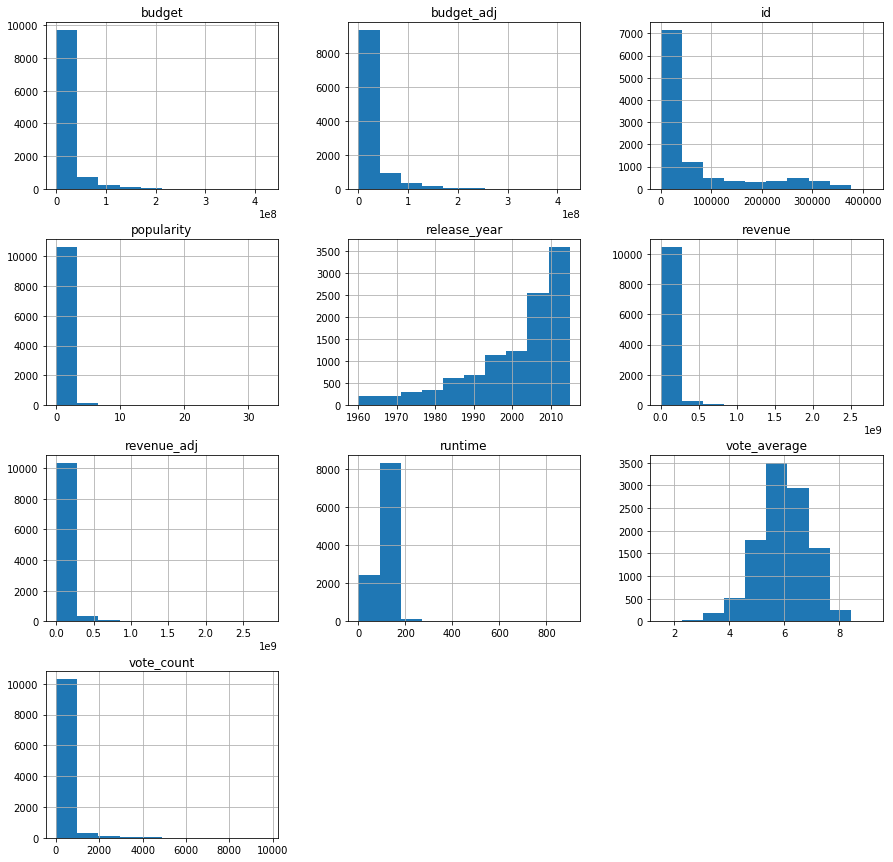

In [81]:
df.hist(figsize=(15,15));

### Notes and Observations
<b>
<br>1- Some values in the following columns (genres, director, cast, keywords, and production companies) are seprated by "|". 
<br>2- There are duplicated rows 
<br>3- There are null values 
<br>4- Some data types are not correct such as the release date which is string while it should be in the datetime format
<br>5- Different columns will not be used in the analysis as they will not contribute to our understandings of the project aim. 
<br>6- When exploring the dataset using (.tail), the following columns (revenue, budget,revenue_adj,budget_adj, and run_time) had a lot of their values= zero


## Data Cleaning 
> In this part we are going to clean the data through the following steps:
<b>
<br>1- Deleting unwanted columns and splitting the values seprated by "|" and adding them to new columns
<br>2- Removing duplicates, Zero values, and NaN values
<br>3- Creating profit column
<br>4- Correcting the dataframe data types
 

### Deleting unwanted columns and splitting the values seprated by "|" and adding them to new columns

In [82]:
#Deleting the unneeded columns
df.drop(['cast', 'id', 'imdb_id', 'homepage','keywords','overview','production_companies','director','tagline'], axis=1, inplace=True)

In [83]:
#I found a code line that was very useful in splitting the values separated by | and creating new columns with the separated values
#source: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_g.head(1)

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None


We shall now merge the df_g with the original dataset using join 

In [84]:
df=df.join([df_g])
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
genres_1          10843 non-null object
genres_2          8515 non-null object
genres_3          5079 non-null object
genres_4          1981 non-null object
genres_5          542 non-null object
dtypes: float64(4), int64(5), object(8)
memory usage: 1.4+ MB


We now need to drop the original genres not to have duplicates

In [86]:
df.drop(['genres'], axis=1, inplace=True)
df.head(1)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None


### Removing duplicates, Zero values, and NaN values
Now, we want to remove all duplicates

In [87]:
df.drop_duplicates(inplace=True)
#to check if all duplicates were dropped 
sum(df.duplicated())

0

First of all, we are going to create a list that contains the columns that we want to replace all zero values (budget, revenue, revenue_adj,budget_adj,and runtime) with NaN. After that we use this list as a subset when we use the dropna function. That is to drop rows that have NaN values in  these columns. I did not replace these zeros with the average as it does not make sense as each movie has its own values and we cannot just apply the average

In [88]:
df.shape

(10865, 16)

In [89]:
Subset=['budget', 'revenue','budget_adj','revenue_adj','runtime']
df[Subset] = df[Subset].replace(0, np.NAN)
df.dropna(subset = Subset, inplace = True)

In [90]:
df.shape

(3854, 16)

 <br><b>*Note the huge difference in the shape of the dataframe before and after the cleaning 
<br>Before: 10865 rows
<br>After: 3854 rows

### Creating the profit column
Now, I want to add a new column called 'profit' which will be calculated accordingly:
<br> profit = revenue_adj - budget_adj
<br> I chose revenue_adj and budget_adj and not revenue and budget as revenue_adj and budget_adj show the budget and
revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [91]:
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head(1)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,1.254446e+09


### Changing Datatypes 

In [92]:
df['release_date'] =pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)
df['profit'] = df['profit'].astype(int)
                                

In [93]:
#we check again for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 17 columns):
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
runtime           3854 non-null float64
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null int64
revenue_adj       3854 non-null int64
genres_1          3854 non-null object
genres_2          3205 non-null object
genres_3          2112 non-null object
genres_4          873 non-null object
genres_5          259 non-null object
profit            3854 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7), object(6)
memory usage: 542.0+ KB


In [94]:
df.head(1)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5,profit
0,32.985763,150000000,1513528810,Jurassic World,124.0,2015-06-09,5562,6.5,2015,137999939,1392445892,Action,Adventure,Science Fiction,Thriller,None,1254445953


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1:  What are the movies with highest and lowest profit, budget, and revenue?

In [95]:
#Getting the indices of the highest and lowest values for profit, budget, and revenue
print(df['profit'].idxmin())
print(df['budget_adj'].idxmin())
print(df['revenue_adj'].idxmin())
print(df['profit'].idxmax())
print(df['budget_adj'].idxmax())
print(df['revenue_adj'].idxmax())

2244
3581
5067
1329
2244
1386


In [96]:
#Combined data of movies with maximum and minimum profit
Min_profit=pd.DataFrame(df.loc[df['profit'].idxmin()])
Max_profit=pd.DataFrame(df.loc[df['profit'].idxmax()])
Min_Max_profit=Min_profit.join([Max_profit])
Min_Max_profit.rename(columns={2244: "Minimum profit", 1329:"Maximum profit"}, inplace=True)
Min_Max_profit=Min_Max_profit.transpose()
Min_Max_profit

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5,profit
Minimum profit,0.25054,425000000,11087569,The Warrior's Way,100,2010-12-02 00:00:00,74,6.4,2010,425000000,11087569,Adventure,Fantasy,Action,Western,Thriller,-413912431
Maximum profit,12.0379,11000000,775398007,Star Wars,121,1977-03-20 00:00:00,4428,7.9,1977,39575591,2789712242,Adventure,Action,Science Fiction,None,None,2750136650


In [97]:
#Combined data of movies with maximum and minimum budget
Min_budget=pd.DataFrame(df.loc[df['budget_adj'].idxmin()])
Max_budget=pd.DataFrame(df.loc[df['budget_adj'].idxmax()])
Min_Max_budget=Min_budget.join([Max_budget])
Min_Max_budget.rename(columns={3581: "Minimum budget", 2244:"Maximum budget"}, inplace=True)
Min_Max_budget=Min_Max_budget.transpose()
Min_Max_budget

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5,profit
Minimum budget,0.52043,1,1378,"Love, Wedding, Marriage",90,2011-06-03 00:00:00,55,5.3,2011,0,1335,Comedy,Romance,None,None,None,1334
Maximum budget,0.25054,425000000,11087569,The Warrior's Way,100,2010-12-02 00:00:00,74,6.4,2010,425000000,11087569,Adventure,Fantasy,Action,Western,Thriller,-413912431


In [98]:
#Combined data of movies with maximum and minimum revenue
Min_revenue=pd.DataFrame(df.loc[df['revenue_adj'].idxmin()])
Max_revenue=pd.DataFrame(df.loc[df['revenue_adj'].idxmax()])
Min_Max_revenue=Min_revenue.join([Max_revenue])
Min_Max_revenue.rename(columns={5067: "Minimum revenue", 1386:"Maximum revenue"}, inplace=True)
Min_Max_revenue=Min_Max_revenue.transpose()
Min_Max_revenue

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5,profit
Minimum revenue,0.462609,6000000,2,Shattered Glass,94,2003-11-14 00:00:00,46,6.4,2003,7112115,2,Drama,History,None,None,None,-7112113
Maximum revenue,9.43277,237000000,2781505847,Avatar,162,2009-12-10 00:00:00,8458,7.1,2009,240886902,2827123750,Action,Adventure,Fantasy,Science Fiction,None,2586236847


In [99]:
Concatinated_Min_Max=pd.concat([Min_Max_revenue, Min_Max_budget, Min_Max_profit], axis=0, sort=True)
Concatinated_Min_Max


,budget,budget_adj,genres_1,genres_2,genres_3,genres_4,genres_5,original_title,popularity,profit,release_date,release_year,revenue,revenue_adj,runtime,vote_average,vote_count
Minimum revenue,6000000,7112115,Drama,History,None,None,None,Shattered Glass,0.462609,-7112113,2003-11-14 00:00:00,2003,2,2,94,6.4,46
Maximum revenue,237000000,240886902,Action,Adventure,Fantasy,Science Fiction,None,Avatar,9.43277,2586236847,2009-12-10 00:00:00,2009,2781505847,2827123750,162,7.1,8458
Minimum budget,1,0,Comedy,Romance,None,None,None,"Love, Wedding, Marriage",0.52043,1334,2011-06-03 00:00:00,2011,1378,1335,90,5.3,55
Maximum budget,425000000,425000000,Adventure,Fantasy,Action,Western,Thriller,The Warrior's Way,0.25054,-413912431,2010-12-02 00:00:00,2010,11087569,11087569,100,6.4,74
Minimum profit,425000000,425000000,Adventure,Fantasy,Action,Western,Thriller,The Warrior's Way,0.25054,-413912431,2010-12-02 00:00:00,2010,11087569,11087569,100,6.4,74
Maximum profit,11000000,39575591,Adventure,Action,Science Fiction,None,None,Star Wars,12.0379,2750136650,1977-03-20 00:00:00,1977,775398007,2789712242,121,7.9,4428


### Question 2: What is the relation between budget, revenue, and profit?
>We can find that the movie with the highest budget was the movie with the least profit. Also, we found that the movie with highest revenue does not guarantee that it has the highest profit. Also, the lowest revenue does not meant the lowest profit. In the next part, we are going to visualize and plot budget and revenue against profit and budget abd revenue against each other to find the relation between the three of them.

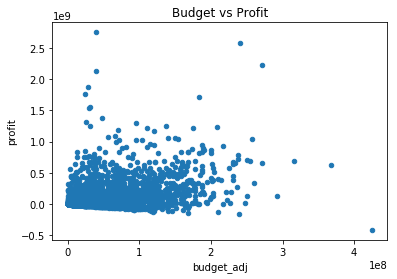

In [100]:
df.plot(x='budget_adj', y='profit', kind='scatter')
plt.title('Budget vs Profit');

We cannot imply a specific trend from this graph but we can find that a very high budget can result in a very low profit, represented by the point on the bottom right of the graph. Moreover, We can find that some movies had very low budgets, yet they achieved highest profits.

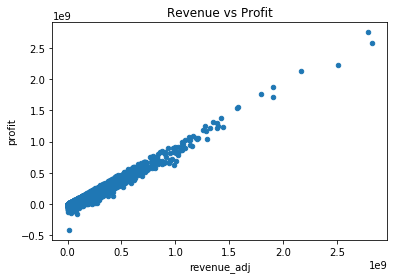

In [101]:
df.plot(x='revenue_adj', y='profit', kind='scatter')
plt.title('Revenue vs Profit');

It is clear hear that ther is a positive correlation between movies revenue and profit. As revenue increases, the profit increases. This is with exception to Avatar and star wars as we showed before. Avatar had more revenue but less profit and that can be seen in the 2 top right points on the scatter plot.

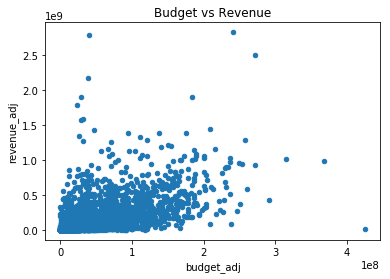

In [102]:
df.plot(x='budget_adj', y='revenue_adj', kind='scatter')
plt.title('Budget vs Revenue');

As you can see here is that this graph is the same as the graph of budget vs profit and that is reasonable as profit= revenue - budget.

### Research Question 3 : What genres are most produced every year?

In [103]:
#I will only consider the column genres_1
genres1=pd.DataFrame(df.groupby('release_year')['genres_1'].describe())

In [126]:
genres1

,count,unique,top,freq
release_year,,,,
1960,5,3,Action,2
1961,10,7,Comedy,3
1962,7,4,Adventure,2
1963,6,5,Action,2
1964,7,4,Drama,3
1965,5,3,Drama,3
1966,5,4,Action,2
1967,13,6,Crime,4
1968,9,7,Adventure,2


### Question 4: What are the genres with highest and lowest profit/revenue?
Now, we want to know the genres that highest average profit and lowest average profit

In [105]:
#Genre with highest average profit
df.groupby('genres_1')['profit'].mean().astype(int).idxmax()

'Adventure'

In [106]:
#Genre with lowest average profit
df.groupby('genres_1')['profit'].mean().astype(int).idxmin()

'Documentary'

In [107]:
#Genre with highest average revenue
df.groupby('genres_1')['revenue_adj'].mean().astype(int).idxmax()

'Adventure'

In [108]:
#Genre with lowest average revenue
df.groupby('genres_1')['revenue_adj'].mean().astype(int).idxmin()

'Documentary'

As we can see, adventure genre yields both the highest average profit and revenue while documentary genre yields the lowest average profit and revenue among other genres 

In [109]:
profit_genres=pd.DataFrame(df.groupby('genres_1')['profit'].mean().astype(int))
profit_genres

,profit
genres_1,
Action,101597281
Adventure,217998880
Animation,210572195
Comedy,69547772
Crime,66613508
Documentary,18705543
Drama,60079614
Family,205392353
Fantasy,130278502


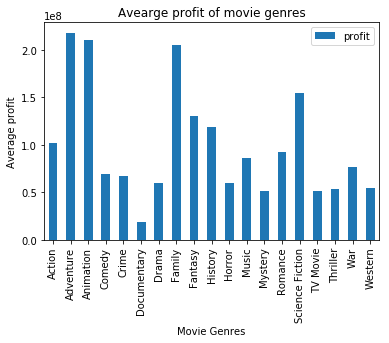

In [110]:
profit_genres.plot(kind='bar')
plt.title('Avearge profit of movie genres')
plt.xlabel('Movie Genres')
plt.ylabel('Average profit');


In [111]:
revenue_genres=pd.DataFrame(df.groupby('genres_1')['revenue_adj'].mean().astype(int))
revenue_genres

,revenue_adj
genres_1,
Action,162652490
Adventure,304158606
Animation,295984106
Comedy,100602242
Crime,98414836
Documentary,23631540
Drama,90964257
Family,272841110
Fantasy,194329298


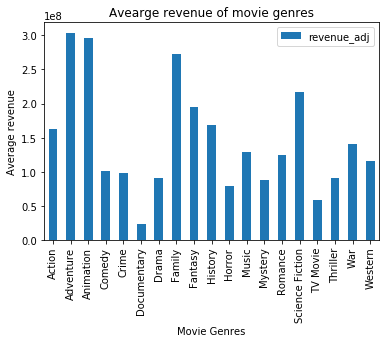

In [112]:
revenue_genres.plot(kind='bar')
plt.title('Avearge revenue of movie genres')
plt.xlabel('Movie Genres')
plt.ylabel('Average revenue');

### Question 5: What is the relation between runtime and profit/revenue?

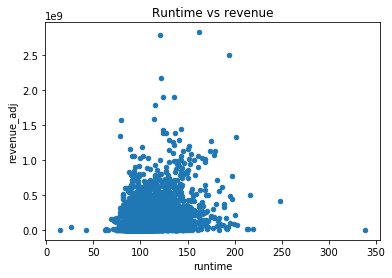

In [113]:
df.plot(x='runtime', y='revenue_adj', kind='scatter')
plt.title('Runtime vs revenue');

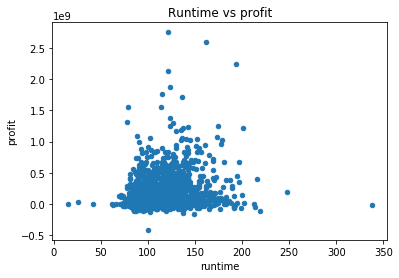

In [114]:
df.plot(x='runtime', y='profit', kind='scatter')
plt.title('Runtime vs profit');

We cannot find a specific trend about the relation ship between runtime and revenue from this chart. So, I am going to categorize the runtime into short,intermediate,moderately long and long and then investigate if a certain category of them is associate with higher/ lower revenue/profit

In [115]:
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [116]:
bin_edges = [ 15,90,120 ,150, 338] # Fill in this list with five values you just found
bin_names = ['Short','Intermediate','Moderately long','Long' ] # Name each acidity level category
df['duration'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)
df

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5,profit,duration
0,32.985763,150000000,1513528810,Jurassic World,124.0,2015-06-09,5562,6.5,2015,137999939,1392445892,Action,Adventure,Science Fiction,Thriller,None,1254445953,Moderately long
1,28.419936,150000000,378436354,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,137999939,348161292,Action,Adventure,Science Fiction,Thriller,None,210161353,Intermediate
2,13.112507,110000000,295238201,Insurgent,119.0,2015-03-18,2480,6.3,2015,101199955,271619025,Adventure,Science Fiction,Thriller,None,None,170419069,Intermediate
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,183999919,1902723129,Action,Adventure,Science Fiction,Fantasy,None,1718723210,Moderately long
4,9.335014,190000000,1506249360,Furious 7,137.0,2015-04-01,2947,7.3,2015,174799923,1385748801,Action,Crime,Thriller,None,None,1210948878,Moderately long
5,9.110700,135000000,532950503,The Revenant,156.0,2015-12-25,3929,7.2,2015,124199945,490314247,Western,Drama,Adventure,Thriller,None,366114301,Long
6,8.654359,155000000,440603537,Terminator Genisys,125.0,2015-06-23,2598,5.8,2015,142599937,405355075,Science Fiction,Action,Thriller,Adventure,None,262755138,Moderately long
7,7.667400,108000000,595380321,The Martian,141.0,2015-09-30,4572,7.6,2015,99359956,547749654,Drama,Adventure,Science Fiction,None,None,448389698,Moderately long
8,7.404165,74000000,1156730962,Minions,91.0,2015-06-17,2893,6.5,2015,68079970,1064192016,Family,Animation,Adventure,Comedy,None,996112046,Intermediate
9,6.326804,175000000,853708609,Inside Out,94.0,2015-06-09,3935,8.0,2015,160999929,785411574,Comedy,Animation,Family,None,None,624411645,Intermediate


In [117]:
df.groupby('duration')['revenue_adj'].mean().astype(int)

duration
Short               88719130
Intermediate       108615600
Moderately long    224927429
Long               346799708
Name: revenue_adj, dtype: int64

In [118]:
revenue_runtime=pd.DataFrame(df.groupby('duration')['revenue_adj'].mean().astype(int))
revenue_runtime

,revenue_adj
duration,
Short,88719130
Intermediate,108615600
Moderately long,224927429
Long,346799708


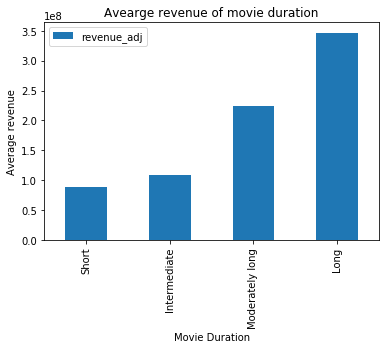

In [119]:
revenue_runtime.plot(kind='bar')
plt.title('Avearge revenue of movie duration')
plt.xlabel('Movie Duration')
plt.ylabel('Average revenue');

In [120]:
df.groupby('duration')['profit'].mean().astype(int)
profit_runtime=pd.DataFrame(df.groupby('duration')['profit'].mean().astype(int))
profit_runtime

,profit
duration,
Short,59615905
Intermediate,70239291
Moderately long,159633565
Long,255858596


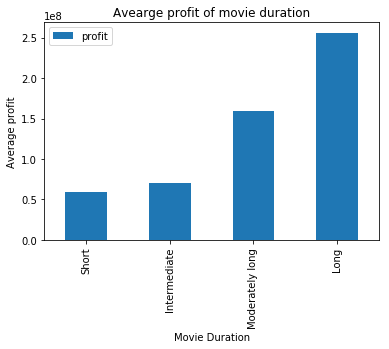

In [121]:
profit_runtime.plot(kind='bar')
plt.title('Avearge profit of movie duration')
plt.xlabel('Movie Duration')
plt.ylabel('Average profit');

From previous data, we can find thta longer films yields more profit and revenue

### Question 6: Does the average buget of movies industry increase/ decrease from one year to another?

In [122]:
df.groupby('release_year')['budget_adj'].mean().astype(int)
budget_year=pd.DataFrame(df.groupby('release_year')['budget_adj'].mean().astype(int))
budget_year

,budget_adj
release_year,
1960,30681789
1961,28185154
1962,40624757
1963,72524960
1964,34081893
1965,81385828
1966,43355379
1967,48020071
1968,37578953


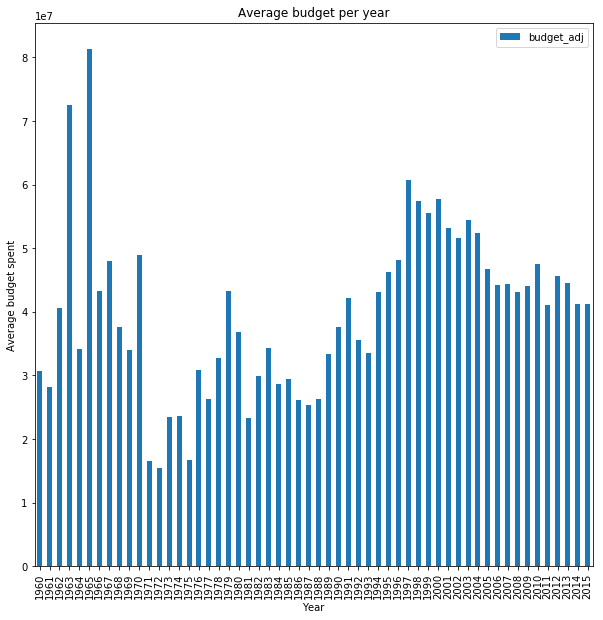

In [123]:
budget_year.plot(kind='bar',figsize=(10,10))
plt.title('Average budget per year')
plt.xlabel('Year')
plt.ylabel('Average budget spent');

>As can be seen, there was a surge in the budget spent for movies in 1965 and then it started fluctuate: some periods of time decreasing and others increasing but it never reached the same as 1965.

<a id='conclusions'></a>
## Conclusions
### The relationship between movies budget, revenue, and profit
<br><b>Tha analysis showed that the movies with highest and lowest budget, revenue, and profit are:
<br> Avatar (Highest revenue)
<br> Star wars (Highest profit)
<br> The warrior's Way (Highest Budget and lowest profit)
<br> Shattered Glass (Lowest Revenue)
<br> Love, Wedding, Marriage (Lowest Budget)
<br>
<br>  There is a positive correlation between revenues and profit as they are directly proportional to each other but with some exceptions. For example, movies with highest revenues does not mean that they would have highest profits and that is specially when their budget is very high. Similarily, Movies with lowest revenues does not mean that they would get lowest profits and that is specially when their budget is very low. 
<br>
<br>I found that movie with highest budget had the lowest profit(The warrior's way). Very high budget can result in a very low profit and specially if the revenue was not that high and vice versa. Low budgets can result in very high profit and specially if the revenue was very high.
<br>
<br><b>Limitations: In this analysis, Love, Wedding, Marriage showed a budget of 1 dollar which  is not reasonable. Moreove, the used budget_adj was zero. When I checked the budget online it was ~13 millions USD. Accordingly, I assume that these values were mistakenly inserted in the dataset. Also, the budget for the Warrior's way was unreasonably high (~ 420 million USD) but when I checked it online, it was found to be 42 millions instead. One way to avoid that would be by parsing data about movies with unreasonable budget, revenues from the internet and replace the unreasonable old values with newly parsed data.

### Genres that are most produced from year to another 
<b> Most of the years from 1960 to 2015,
<br> Drama genre was most produced in 24 years
<br> Comedy and Action genres were most produced in 12 years 
<br> Adventure genre was most produced in 4 years
<br> Crime genre was most produced in 2 years
<br> Horror and Science Fiction genres were most produced in 1 year
<br>
<br><b> More to look for: We can look for how each genre most produced in a year was related to the environment in the places in which the movies were producded.

### The relation between movies genres and profit/ revenue
<b> Adventure movies have the highest average profit and revenue among all movie genres while documentary movies have the lowest average profit and revenue among all movie genres.
    
### The relation between movies runtime and profit/ revenue
<b> Longer movies have higher porfit and revenue than shorter movies.

### The average movies budgets spent from year to 
<b> Along the years from 1960 to 2015,
<br><b> There was a surge in the average movies budgets in 1965. After that, a notable decrease ocurred and every while there is an increase followed by a peak then a decrease in the average movie budgets.
<br>
<br><b> Possible explanation: In my opinion such peaks/ surges are associated with new technologies in movies industry that are too expensive when discovered and then become cheaper by years.

In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0